In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from datatools.metmast import EddyPro_full_output

In [4]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Heat flux calculated from near-surface temperature
compared with measurements in Nov 2016 at WFIP2 Physics Site

In [5]:
datadir = {
    'met.z18.b0': '/Users/equon/WFIP2/PS01/met.z18.b0', # PS01
}
suffix = 'son03m.full_output.csv'

In [6]:
varlist = [
    'wind_speed',
    'wind_dir',
    'sonic_temperature',
    'TKE',
    'u*',
    #'cov(w/u)',
    'w/ts_cov',
    '(z-d)/L'
]

## read all data

In [7]:
%%time
dap_id = 'met.z18.b0'
globstr = os.path.join(datadir[dap_id],'{}.*.{}'.format(dap_id,suffix))
filelist = glob.glob(globstr)
df = EddyPro_full_output(*filelist,columns=varlist)
df = df.sort_index()
df = df.rename(columns={'w/ts_cov':'Tw','(z-d)/L':'z/L'})
print(dap_id,': read',len(filelist),'files for datetimes from',df.index[0],'to',df.index[-1])

met.z18.b0 : read 30 files for datetimes from 2016-11-01 00:15:00 to 2016-12-01 00:00:00
CPU times: user 182 ms, sys: 19 ms, total: 201 ms
Wall time: 291 ms


## calculate heat flux from temperature

In [8]:
import sys
sys.path.append('/Users/equon/repos/pytools')
from SurfaceLayerSchemes import MOST

In [9]:
z0 = 0.05 # roughness height
z1,z2 = 3.0, 10.0 # probe heights

In [10]:
mo = MOST()

In [11]:
mo.calculateFluxes(z1,5.0,z0,Ts=300.0,T1=290.0)

(0.5591635215411359, -1.1613426313743607)

## plots

Text(0.5, 1.0, 'Obukhov Stability Parameter')

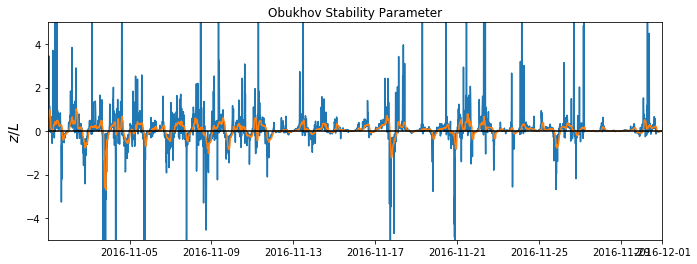

In [12]:
fig,ax = plt.subplots(figsize=(11,4))
df_3h_med = df.rolling('3h').median()
ax.plot(df.index,df['z/L'])
ax.plot(df_3h_med.index,df_3h_med['z/L'])
ax.axhline(0,color='k')
ax.set_xlim((df.index[0],df.index[-1]))
ax.set_ylim((-5,5))
ax.set_xlabel('')
ax.set_ylabel(r'$z/L$',fontsize='x-large')
ax.set_title('Obukhov Stability Parameter')

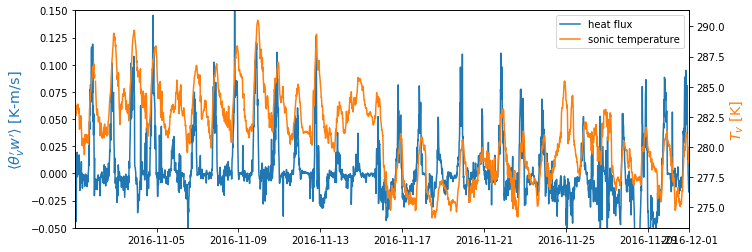

In [13]:
fig,ax = plt.subplots(figsize=(11,4))
line1, = ax.plot(df.index,df['Tw'])
# ax.axhline(0,color='k')
ax.set_xlim((df.index[0],df.index[-1]))
ax.set_ylim((-.05,.15))
ax.set_ylabel(r"$\langle \theta_v' w' \rangle$ [K-m/s]",fontsize='x-large',color=colors[0])

ax2 = ax.twinx()
line2, = ax2.plot(df.index,df['sonic_temperature'],color=colors[1])
#ax.set_ylim((-1,1))
ax2.set_ylabel(r'$T_v$ [K]',fontsize='x-large',color=colors[1])

ax.set_xlabel('')
ax.legend((line1,line2),('heat flux','sonic temperature'))

(-1, 1)

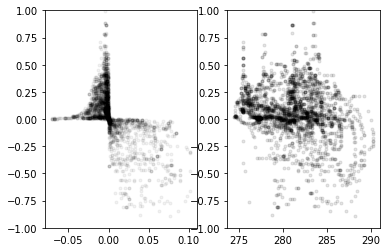

In [14]:
fig,ax = plt.subplots(ncols=2)
ax[0].plot(df_3h_med['Tw'],df_3h_med['z/L'],'ko',markersize=3,alpha=0.05)
ax[1].plot(df_3h_med['sonic_temperature'],df_3h_med['z/L'],'ko',markersize=3,alpha=0.1)
ax[0].set_ylim((-1,1))
ax[1].set_ylim((-1,1))